<a href="https://colab.research.google.com/github/egecandrsn/Car_resale_data-2023/blob/main/Car_Resale_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [210]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.f' % x)
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [211]:
#Let's import data from GitHub. I uploaded to GitHub for ease of use with colab. Thanks to: https://www.kaggle.com/rahulmenon1758

data=pd.read_csv("https://raw.githubusercontent.com/egecandrsn/Car_resale_data-2023/main/car_resale_prices.csv",index_col=0)

In [212]:
data.head()

,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city
0,2017 Maruti Baleno 1.2 Alpha,₹ 5.45 Lakh,2017,1197 cc,Third Party insurance,Manual,"40,000 Kms",First Owner,Petrol,83.1bhp,5,21.4 kmpl,Hatchback,Agra
1,2018 Tata Hexa XTA,₹ 10 Lakh,2018,2179 cc,Third Party insurance,Automatic,"70,000 Kms",First Owner,Diesel,153.86bhp,7,17.6 kmpl,MUV,Agra
2,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5,20.85 kmpl,Sedan,Agra
3,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5,20.85 kmpl,Sedan,Agra
4,2009 Hyundai i10 Magna 1.1,₹ 1.60 Lakh,2009,1086 cc,Third Party insurance,Manual,"80,000 Kms",First Owner,Petrol,68.05bhp,5,19.81 kmpl,Hatchback,Agra


In [213]:
#Wow! Lots of object values. Let's clean them.

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17446 entries, 0 to 17445
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   full_name          17446 non-null  object 
 1   resale_price       17446 non-null  object 
 2   registered_year    17377 non-null  object 
 3   engine_capacity    17432 non-null  object 
 4   insurance          17439 non-null  object 
 5   transmission_type  17446 non-null  object 
 6   kms_driven         17443 non-null  object 
 7   owner_type         17401 non-null  object 
 8   fuel_type          17446 non-null  object 
 9   max_power          17344 non-null  object 
 10  seats              17436 non-null  float64
 11  mileage            16938 non-null  object 
 12  body_type          17446 non-null  object 
 13  city               17446 non-null  object 
dtypes: float64(1), object(13)
memory usage: 2.0+ MB


In [214]:
#Get unique values

for i in data.columns:
  print(i)
  print(data[i].unique())
  print(70*"-")

full_name
['2017 Maruti Baleno 1.2 Alpha' '2018 Tata Hexa XTA'
 '2015 Maruti Swift Dzire VXI' ... '2016 Toyota Camry 2.5 Hybrid'
 '2016 Toyota Corolla Altis GL MT' '2017 Maruti Swift Dzire VDi']
----------------------------------------------------------------------
resale_price
['₹ 5.45 Lakh' '₹ 10 Lakh' '₹ 4.50 Lakh' ... '₹ 62.90 Lakh' '₹ 26.89 Lakh'
 '₹ 11.29 Lakh']
----------------------------------------------------------------------
registered_year
['2017' '2018' '2015' '2009' '2010' '2016' '2014' '2020' '2021' '2019'
 '2011' '2012' '2013' '2022' '2004' 'Jul 2021' 'Dec 2018' 'Jun 2018'
 'Mar 2016' 'Feb 2018' 'Oct 2014' 'Mar 2014' 'Feb 2013' nan 'Aug 2018'
 'Jun 2019' 'Dec 2021' 'Apr 2019' 'May 2018' 'Nov 2013' 'Sept 2022'
 'Jan 2021' 'Sept 2020' 'Jan 2015' 'Oct 2017' 'Sept 2019' 'Jul 2019'
 'Mar 2020' 'Jan 2018' 'Nov 2015' 'May 2015' 'Dec 2014' 'Feb 2019'
 'May 2016' 'Apr 2018' 'May 2021' '2008' 'Mar 2022' 'Jun 2016' 'Jul 2020'
 'Jun 2017' 'Jul 2016' 'Jun 2015' 'Sept 2018' 'Nov 20

###Here are checklist for data cleaning part:



---


* Remove '₹' and 'Lakh' from resele_price column and turn values to us dollar for

* Firstly, just leave as it is, years from full_name. Maybe we can compare with actual years.

* Remove '₹' and 'Lakh' from resale_price column and turn values to us dollar for convenience.

* Get rid of month values, just use years from registered_year.

* Turn engine_capacity to int values by removing cc.

* Making Third Party and Third Party Insurance values equal to each other. And if nan or junk turn them to 0.

* Turn transmission_type to dummy variables.

* We need to turn kms_driven to int values and maybe can normalize.

* max_power columns is a mess, let's just get rid of it.

* We can take a quick look for seats column for nan and outliers. I know India is crowded place but more than 5 seats is unexpected.

* Turn object values to int for mileage column.

* We should get rid of body_type column if brand names are common in rows.

* City is looks good.

##Let's dive in.


---



In [215]:
#Remove '₹' and 'Lakh' from resale_price column and turn values to us dollar for convenience.

data["resale_price"]=data["resale_price"].str.replace('₹', '').str.replace('Lakh', '').str.replace(',','').str.replace('Crore','').astype(float)

#for up-to-date data, let's use api to convert currency

import requests

def convert_lakh_to_usd(lakh):
    url = f'https://api.exchangerate-api.com/v4/latest/INR'
    response = requests.get(url)
    data = response.json()
    exchange_rate = data['rates']['USD']
    return lakh * exchange_rate * 100000

data["resale_price"]=convert_lakh_to_usd(data["resale_price"]).astype(int)

In [216]:
#Get rid of month values, just use years from registered_year.
#There is '' empty strings, turn them to np.nan

import re
import numpy as np
data["registered_year"] = data["registered_year"].apply(lambda x: re.sub(r'\D+', '', str(x)))
data["registered_year"] = data["registered_year"].replace('', np.nan)

In [217]:
#Turn engine_capacity to int values by removing cc. Just copy the cell below.

import re
import numpy as np
data['engine_capacity'] = data['engine_capacity'].apply(lambda x: re.sub(r'\D+', '', str(x)))
data['engine_capacity'] = data['engine_capacity'].replace('', np.nan)

In [218]:
#Making Third Party and Third Party Insurance values equal to each other. And if nan or junk turn them to 0.

import numpy as np
data["insurance"]=data["insurance"].str.replace('Third Party insurance','Third Party').replace('Not Available',np.nan).replace('nan',np.nan).replace('2',np.nan).replace('1',np.nan)
data["insurance"].fillna(0, inplace=True)

In [219]:
#Turn transmission_type to dummy variables.

data=pd.get_dummies(data, columns=["transmission_type"])

In [220]:
#We need to turn kms_driven to int values and maybe can normalize later.

data["kms_driven"] = data["kms_driven"].apply(lambda x: re.sub(r'\D+', '', str(x)))
data["kms_driven"] = data["kms_driven"].replace('', np.nan)

In [221]:
#max_power columns is a mess, did you notice there are both bhp, rpm and kw values. There are some options:
#1. We can write a perfect regex function
#2. We can clean it with the help of llm api call
#3. We can just leave numbers and then clean from outliers but this is loosing a lot of data
#4. We can delete the column. Let's do this.

data=data.drop(["max_power"], axis=1)

Data shape: (17446, 14)
Seats Column NaN Count: 10


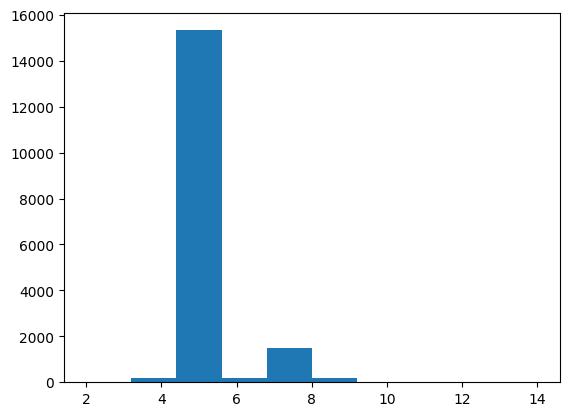

In [222]:
#We can take a quick look for seats column for nan and outliers.

import matplotlib.pyplot as plt
plt.hist(data.seats)
print(f"Data shape: {data.shape}")
print(f"Seats Column NaN Count: {data.seats.isna().sum()}")

In [223]:
#Turn object values to int for mileage column.

data["mileage"] = data["mileage"].apply(lambda x: re.sub(r'\D+', '', str(x)))
data["mileage"] = data["mileage"].replace('', np.nan)

In [224]:
#We should get rid of body_type column if brand names are common in rows.

data["body_type"].value_counts()

Hatchback        7343
Sedan            4781
SUV              4406
MUV               759
Minivans           65
Maruti             19
Pickup             13
Coupe              10
Cars                8
Tata                7
Mercedes-Benz       6
Mahindra            4
Chevrolet           3
Jaguar              3
Wagon               3
BMW                 2
Toyota              2
Datsun              2
Honda               2
Convertibles        2
Audi                1
Porsche             1
Volvo               1
Hyundai             1
Skoda               1
Isuzu               1
Name: body_type, dtype: int64

In [225]:
#Wonderful! We can keep first 4 values.

import numpy as np
data["body_type"]=data["body_type"].replace(['Minivans', 'Toyota', 'Coupe',
       'Chevrolet', 'Mercedes-Benz', 'Audi', 'Maruti', 'Pickup',
       'Porsche', 'Tata', 'Mahindra', 'Volvo', 'Jaguar', 'BMW', 'Cars',
       'Datsun', 'Hyundai', 'Honda', 'Convertibles', 'Wagon', 'Skoda',
       'Isuzu'], np.nan)

In [226]:
# Drop NaN and convert objects to int or float

data=data.dropna()
data["resale_price"]=data["resale_price"].astype(int)
data["registered_year"]=data["registered_year"].astype(int)
data["engine_capacity"]=data["engine_capacity"].astype(int)
data["kms_driven"]=data["kms_driven"].astype(int)
data["seats"]=data["seats"].astype(int)
data["mileage"]=data["mileage"].astype(int)
data["transmission_type_Automatic"]=data["transmission_type_Automatic"].astype(int)
data["transmission_type_Manual"]=data["transmission_type_Manual"].astype(int)

<ipython-input-226-0d6aa58cbf61>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["resale_price"]=data["resale_price"].astype(int)
<ipython-input-226-0d6aa58cbf61>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["registered_year"]=data["registered_year"].astype(int)
<ipython-input-226-0d6aa58cbf61>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

In [227]:
import numpy as np
from scipy import stats

int_columns = data.select_dtypes(include=np.int64)

# Calculate the z-scores for each value in the DataFrame.
z_scores = np.abs(stats.zscore(int_columns))

# Remove rows where any column has a z-score greater than a threshold
threshold = 3
data = data[(z_scores < threshold).all(axis=1)]

In [228]:
#Look at data, how beautiful is...

data.describe()

,resale_price,registered_year,engine_capacity,kms_driven,seats,mileage,transmission_type_Automatic,transmission_type_Manual
count,15977,15977,15977,15977,15977,15977,15977,15977
mean,9372,2016,1373,57542,5,998,0,1
std,9254,3,371,31746,1,961,0,0
min,1200,2006,72,300,4,8,0,0
25%,4524,2014,1197,32657,5,178,0,0
50%,6876,2017,1199,54833,5,243,0,1
75%,10200,2019,1498,78474,5,1987,1,1
max,103200,2023,2755,246749,7,3405,1,1


In [229]:
# All clean! How much is loss?

first_data_shape=pd.read_csv("https://raw.githubusercontent.com/egecandrsn/Car_resale_data-2023/main/car_resale_prices.csv",index_col=0).shape
print(f"Shape of data was {first_data_shape}")
print(f"Number of total loss data: {first_data_shape[0]-data.shape[0]}")

Shape of data was (17446, 14)
Number of total loss data: 1469


#Read for getting know the data? I prepared some questions:

In [230]:
#What is the average resale price of the vehicles in this dataset?

data["resale_price"].mean()

9372.157538962258

In [231]:
#Which vehicle has the highest resale price?

data[data["resale_price"]==(data["resale_price"].max())]

,full_name,resale_price,registered_year,engine_capacity,insurance,kms_driven,owner_type,fuel_type,seats,mileage,body_type,city,transmission_type_Automatic,transmission_type_Manual
8956,2020 Land Rover Range Rover Velar P250 R-Dynamic,103200,2020,1997,Third Party,35314,First Owner,Petrol,5,158,SUV,Hyderabad,1,0


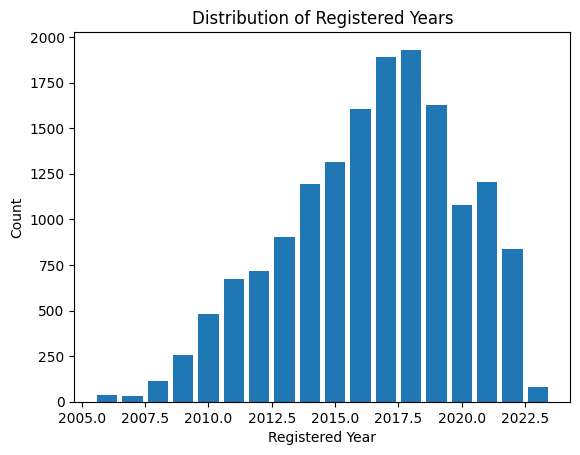

In [232]:
#What is the distribution of values in the "registered_year" column of the dataset?

import matplotlib.pyplot as plt

plt.bar(data["registered_year"].value_counts().index, data["registered_year"].value_counts())
plt.xlabel("Registered Year")
plt.ylabel("Count")
plt.title("Distribution of Registered Years")
plt.show()

In [233]:
#Which vehicle has the lowest engine capacity?

data[data["engine_capacity"]==(data["engine_capacity"].min())].head()

,full_name,resale_price,registered_year,engine_capacity,insurance,kms_driven,owner_type,fuel_type,seats,mileage,body_type,city,transmission_type_Automatic,transmission_type_Manual
10558,2017 Mahindra e2o Plus P8,5520,2017,72,Third Party,20000,Second Owner,Electric,4,140,Hatchback,Bangalore,1,0
14181,2017 Mahindra e2o Plus P8,6600,2017,72,Third Party,10000,First Owner,Electric,4,140,Hatchback,Delhi,1,0
14193,2017 Mahindra e2o Plus P8,6600,2017,72,Third Party,10000,First Owner,Electric,4,140,Hatchback,Delhi,1,0


In [234]:
#How different is the registered_year from full_name's year value?

(data['full_name'].str.extract(r'(\d{4})').astype(int) == data["registered_year"]).isna().sum().sum()

0

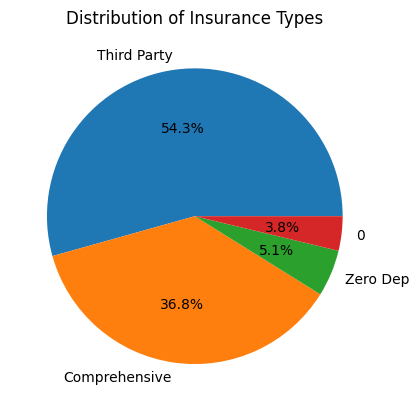

In [235]:
#What is the most common type of insurance in the dataset?

import matplotlib.pyplot as plt

plt.pie(data['insurance'].value_counts(), labels=data['insurance'].value_counts().index, autopct='%1.1f%%')
plt.title('Distribution of Insurance Types')
plt.show()

In [236]:
#How many vehicles have had multiple owners?

data["owner_type"].value_counts().tail(len(data["owner_type"].value_counts())-1).sum()

4594

In [237]:
#Which fuel type is more prevalent?

data["fuel_type"].value_counts()

Petrol      10736
Diesel       4785
CNG           431
LPG            22
Electric        3
Name: fuel_type, dtype: int64

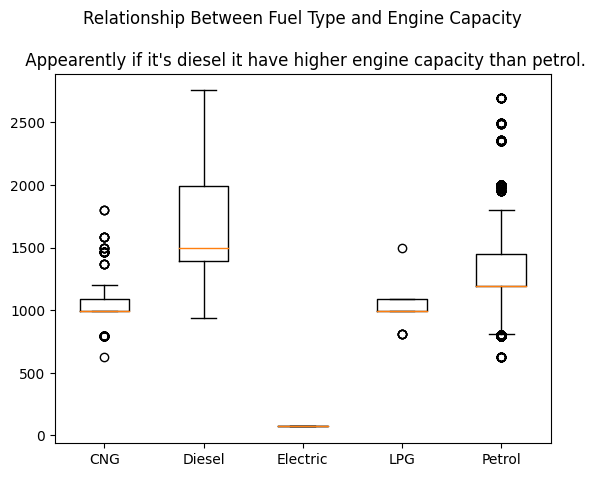

In [238]:
#Is there a relationship between fuel_type and engine_capacity?


import matplotlib.pyplot as plt
fuel_groups = data.groupby('fuel_type')['engine_capacity'].apply(list)
plt.boxplot(fuel_groups.values, labels=fuel_groups.index)
plt.title("Relationship Between Fuel Type and Engine Capacity\n\n Appearently if it's diesel it have higher engine capacity than petrol.")
plt.show()

In [239]:
#How many seats do most vehicles have on average? How is the difference varies by body_type?

average_seats_by_body_type = data.groupby('body_type')['seats'].mean()
most_seats_body_type = average_seats_by_body_type.idxmax()
most_seats_average = average_seats_by_body_type.max()
print(f"{most_seats_body_type} have most seats, average is {most_seats_average}")
least_seats_body_type = average_seats_by_body_type.idxmin()
least_seats_average = average_seats_by_body_type.min()
print(f"{least_seats_body_type} have least seats, average is {least_seats_average}")

MUV have most seats, average is 6.912052117263844
Hatchback have least seats, average is 4.994351080355882


In [240]:
#How is the general difference between vehicles varies by city?

pd.set_option('display.max_columns', None)
data.groupby('city').describe()

resale_price                                          \
                  count  mean   std  min  25%  50%   75%    max   
city                                                              
Agra                188  6001  4294 1200 3000 4800  7800  30000   
Ahmedabad          1225  8269  6232 1200 4680 6768 10068  81600   
Bangalore          2158 10148  8822 1272 5499 7860 11100  96000   
Chandigarh          398  7196  5015 1260 4200 6114  8580  42000   
Chennai            1250 10416 11107 1200 5040 7254 10389  84000   
Delhi              2730 10139 10959 1200 4380 6612 10560  96000   
Gurgaon             969  8595  9858 1200 3755 5916  9000  88800   
Hyderabad          1479  9288  7955 1200 4800 7271 10698 103200   
Jaipur              811  7970  6865 1200 4080 6240  9378  70680   
Kolkata            1071  8931  9955 1200 3840 5771  9720  94800   
Lucknow             512  6651  4216 1200 4227 6108  7944  39000   
Mumbai             1886 11132 10891 1200 5175 7800 11988  92400   
Pune               1300  8095  7296 1200 4017 6108  9300  85200   

           registered_year                                   engine_capacity  \
                     count mean std  min  25%  50%  75%  max           count   
city                                                                           
Agra                   188 2015   4 2009 2013 2015 2019 2022             188   
Ahmedabad             1225 2017   3 2006 2015 2017 2020 2023            1225   
Bangalore             2158 2016   3 2006 2014 2017 2019 2023            2158   
Chandigarh             398 2017   4 2006 2014 2017 2019 2022             398   
Chennai               1250 2017   3 2006 2015 2017 2019 2023            1250   
Delhi                 2730 2017   3 2007 2015 2017 2019 2023            2730   
Gurgaon                969 2016   3 2007 2014 2017 2019 2023             969   
Hyderabad             1479 2017   4 2006 2014 2017 2019 2023            1479   
Jaipur                 811 2016   4 2006 2014 2017 2019 2023             811   
Kolkata               1071 2016   3 2006 2014 2017 2019 2023            1071   
Lucknow                512 2017   3 2006 2015 2017 2019 2023             512   
Mumbai                1886 2016   3 2006 2014 2017 2019 2023            1886   
Pune                  1300 2016   4 2006 2013 2016 2018 2023            1300   

                                            kms_driven                    \
           mean std min  25%  50%  75%  max      count  mean   std   min   
city                                                                       
Agra       1319 346 796 1186 1199 1462 2499        188 73883 39534 10000   
Ahmedabad  1332 333 796 1197 1199 1497 2755       1225 61165 31643  2464   
Bangalore  1367 365  72 1197 1199 1498 2755       2158 54524 30380   940   
Chandigarh 1326 347 796 1197 1199 1497 2755        398 63307 37603   821   
Chennai    1342 355 624 1197 1199 1497 2755       1250 56954 32358   500   
Delhi      1406 402  72 1197 1199 1498 2755       2730 55110 29228   500   
Gurgaon    1355 362 796 1197 1199 1497 2755        969 61631 33424  2300   
Hyderabad  1352 351 796 1197 1199 1497 2755       1479 63467 32556  1457   
Jaipur     1357 372 796 1197 1248 1497 2755        811 69244 35027   386   
Kolkata    1387 376 624 1197 1199 1498 2755       1071 45431 26645   300   
Lucknow    1306 333 796 1197 1199 1462 2755        512 63253 33362   789   
Mumbai     1462 392 624 1197 1396 1591 2755       1886 52503 29810   990   
Pune       1336 353 624 1197 1198 1497 2755       1300 58631 30755  2728   

                                     seats                               \
             25%   50%    75%    max count mean std min 25% 50% 75% max   
city                                                                      
Agra       40000 70000 100000 150000   188    5   1   4   5   5   5   7   
Ahmedabad  35792 60000  81980 195000  1225    5   0   4   5   5   5   7   
Bangalore  31160 51000  72808 191297  2158    5   1   4   5   5  

In [241]:
#What is the distribution of transmission types (Automatic and Manual) in the dataset?

print(f"Automatic type is % {data.transmission_type_Automatic.sum()/len(data)*100}")
print(f"Manual type is % {data.transmission_type_Manual.sum()/len(data)*100}")

Automatic type is % 26.48807661012706
Manual type is % 73.51192338987295


In [242]:
#What is the average resale price for each fuel type?

resale_fuel=data.groupby("fuel_type")["resale_price"].apply(list)
print(f'Average Resale Price for CNG: {np.mean(resale_fuel["CNG"]):.0f}')
print(f'Average Resale Price for Diesel: {np.mean(resale_fuel["Diesel"]):.0f}')
print(f'Average Resale Price for LPG: {np.mean(resale_fuel["LPG"]):.0f}')
print(f'Average Resale Price for Petrol: {np.mean(resale_fuel["Petrol"]):.0f}')

Average Resale Price for CNG: 5664
Average Resale Price for Diesel: 13212
Average Resale Price for LPG: 2647
Average Resale Price for Petrol: 7824


In [243]:
#Which city has the highest average mileage for cars registered in 2020?

mileage_city=data[data["registered_year"]==2020].groupby("city")["mileage"].mean()
arg_max=mileage_city.argmax()
mileage_city.index[arg_max]

'Lucknow'

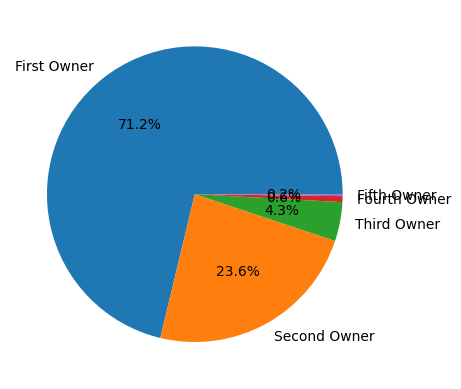

First Owner     11383
Second Owner     3776
Third Owner       681
Fourth Owner      103
Fifth Owner        34
Name: owner_type, dtype: int64


In [244]:
#What is the total number of cars for each owner type?

values=data["owner_type"].value_counts().values
labels=data["owner_type"].value_counts().index
plt.pie(values,labels=labels,autopct='%1.1f%%',labeldistance=1.1)
plt.show()
print(data["owner_type"].value_counts())

In [245]:
#Which year had the highest total resale price for cars with automatic transmission?

year_auto_sale=data[data["transmission_type_Automatic"]==1].groupby("registered_year")["resale_price"].sum()
year_auto_sale_argmax=year_auto_sale.argmax()
year_auto_sale.index[year_auto_sale_argmax]

2018

In [246]:
#What is the average engine capacity for cars in each body type category?

data.groupby("body_type")["engine_capacity"].mean()

body_type
Hatchback   1125
MUV         1714
SUV         1618
Sedan       1512
Name: engine_capacity, dtype: float64

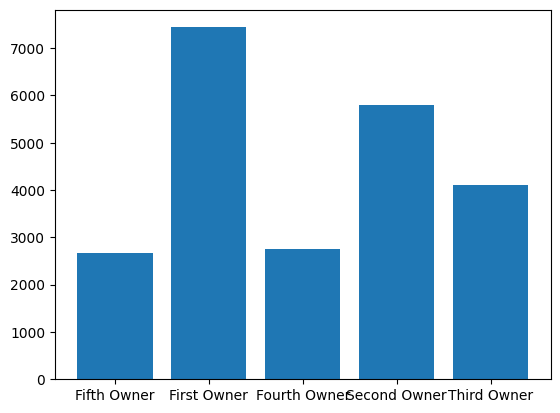

In [247]:
#Which owner type has the highest median resale price?

own_price_val=data.groupby("owner_type")["resale_price"].median().values
own_price_index=data.groupby("owner_type")["resale_price"].median().index
plt.bar(own_price_index,own_price_val)
plt.show()

In [248]:
#What is the median resale price for cars with manual transmission in each city?

data[data["transmission_type_Manual"]==1].groupby("city")["resale_price"].median()

city
Agra         4740
Ahmedabad    6000
Bangalore    7080
Chandigarh   5526
Chennai      6300
Delhi        5796
Gurgaon      5010
Hyderabad    6540
Jaipur       5826
Kolkata      5010
Lucknow      6000
Mumbai       6120
Pune         5400
Name: resale_price, dtype: float64

In [249]:
#Which combination of city and fuel type has the highest average resale price?

city_fuel_price=data.groupby(["city","fuel_type"])["resale_price"].mean()
city_fuel_price_argmax=city_fuel_price.argmax()
city_fuel_price.index[city_fuel_price_argmax]

('Mumbai', 'Diesel')

In [250]:
#What are the most common fuel type and body type categories for vehicles with each transmission type, and how many vehicles fall into this category?

manuel_body_fuel=data[data["transmission_type_Manual"]==1].groupby(["fuel_type","body_type"])["resale_price"].count()
auto_body_fuel=data[data["transmission_type_Manual"]==0].groupby(["fuel_type","body_type"])["resale_price"].count()
print(f"Manual transmission= Category: {manuel_body_fuel.index[manuel_body_fuel.argmax()]} | Number:{manuel_body_fuel.max()}")
print(f"Automatic transmission= Category: {auto_body_fuel.index[auto_body_fuel.argmax()]} | Number:{auto_body_fuel.max()}")

Manual transmission= Category: ('Petrol', 'Hatchback') | Number:4867
Automatic transmission= Category: ('Petrol', 'Hatchback') | Number:1004


#####Let's move on next notebook, Exploratory Data Analysis...